# Heart Disease Prediction

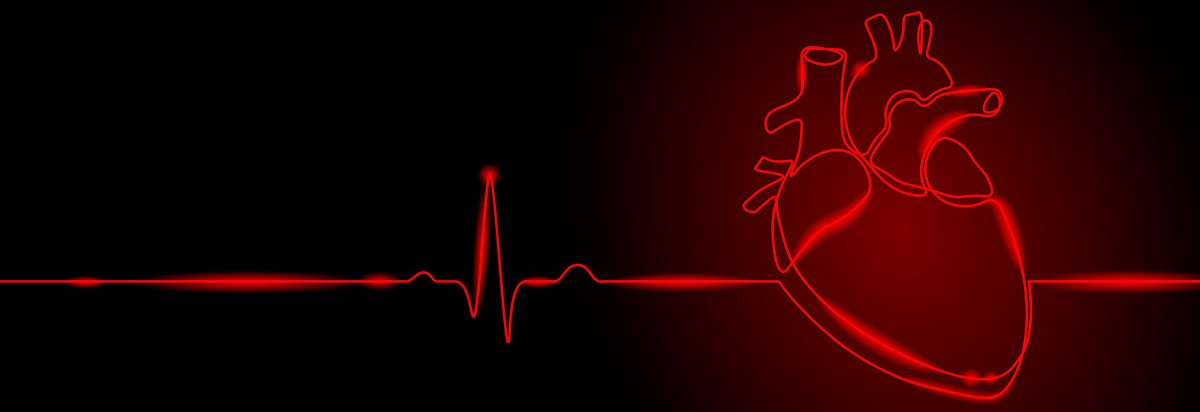

### What is Heart Disease?
Heart disorders of various kinds are referred to as "heart disease." Coronary artery disease (CAD), which affects heart blood flow, is the most prevalent kind of heart disease in the US. A heart attack may be brought on by decreased blood flow.

### Symptoms of heart disease in the blood vessels.
A common cardiac disorder called coronary artery disease affects the main blood arteries that nourish the heart muscle. Coronary artery disease is typically brought on by cholesterol buildup (plaques) in the heart arteries. Atherosclerosis is the term for the accumulation of these plaques (ath-ur-o-skluh-ROE-sis). Reduced blood flow to the heart and other body organs is a result of atherosclerosis. It may result in a heart attack, angina, or a stroke.

Men and women may experience different symptoms of coronary artery disease. For instance, chest pain is more common among men. Together with chest tightness, women are more prone to experience additional symptoms like breathlessness, nausea, and excessive weariness.

### Symptoms of coronary artery disease can include:
- Breathing difficulty
- Pain in the neck, jaw, throat, upper belly area or back
- Chest pain, chest tightness, chest pressure and chest discomfort (angina).
- Pain, numbness, weakness or coldness in the legs or arms if the blood vessels in those body areas are narrowed.
- Lightheadedness
- Dizziness

###  The risk factors involved for heart disease.
Smoking, high blood pressure, and high cholesterol are major risk factors for heart disease. A person's risk for heart disease can also be increased by a number of additional medical issues and lifestyle decisions, such :
- Unhealthy diet
- Overweight and obesity
- Physical inactivity
- Excessive alcohol use
- Diabetes



## About Dataset
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).<br>

Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


# Data Dictionary

Attributes in the data set:
- <b>age</b>: Age in years
- <b>sex</b>: sex (1 = male; 0 = female)
- <b>Cp</b>: Chest pain type
-- <i>Value 1: typical angina
-- <i>Value 2: atypical angina
-- <i>Value 3: non-anginal pain
-- <i>Value 4: asymptomatic chest 
- <b>trestbps</b>: Resting blood pressure (in mm Hg on admission to the hospital).
- <b>chol</b>: Serum cholesterol in mg/dl.
- <b>fbs</b>: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
- <b>restecg</b>: Resting electrocardiographic results
-- <i>Value 0: Normal
-- <i>Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation   or depression of > 0.05 mV).
-- <i>Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.
- <b>thalach</b>: Maximum heart rate achieved
- <b>exang</b>: Exercise induced angina (1 = yes; 0 = no)
- <b>oldpeak</b>: ST depression induced by exercise relative to rest
- <b>slope</b>: The slope of the peak exercise ST segment
-- <i>Value 1: upsloping
-- <i>Value 2: flat
-- <i>Value 3: down sloping
- <b>ca</b>: Number of major vessels (0-3) coloured by fluoroscopy.
- <b>thal</b>: 0 = normal; 1 = fixed defect; 2 = reversable defect.
<br><br>
<i> **The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.**

In [12]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
# creating dataframe using csv 
data = pd.read_csv("heart.csv")

In [14]:
# creating copy of main dataframe
df = data.copy()

In [15]:
# shape of dataframe
print("Data frame has", df.shape[0], "rows.")
print("Data frame has", df.shape[1], "columns.")

Data frame has 1025 rows.
Data frame has 14 columns.


In [8]:
# printing first 5 rows of dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Number of non-null values and data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# basic statistical features of each attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
# number of unique values in each attribute 
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
# selecting 5 rowss from dataframe randomly
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
491,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
478,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
485,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
730,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1


## Data Manipulation

In [17]:
# sum of null values in each attribute
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# total sum of null values
df.isnull().sum().sum()

0

# Exploratory Data Analysis

Number of patients suffering from Heart disease : 526
Number of patients not suffering from Heart disease : 499


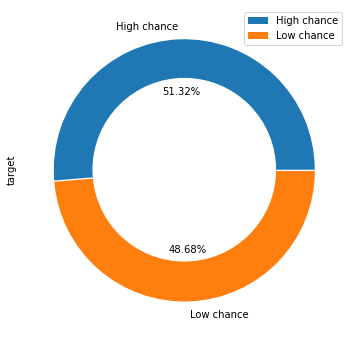

In [12]:
# number of patients suffering and not suffering from heart disease
print("Number of patients suffering from Heart disease :", df['target'].value_counts()[1])
print("Number of patients not suffering from Heart disease :", df['target'].value_counts()[0])

# piechart to visualize the patients with and without heart disease
plt.figure(figsize=(6,6))
df['target'].value_counts().plot.pie(labels=['High chance', 'Low chance'], explode=(0,0.01), autopct='%1.2f%%')

circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf() # get current figure
p.gca().add_artist(circle) # get current axis
plt.legend()
plt.show()

Percentage of MALE patients: 30.44%
Percentage of FEMALE patients: 69.56%


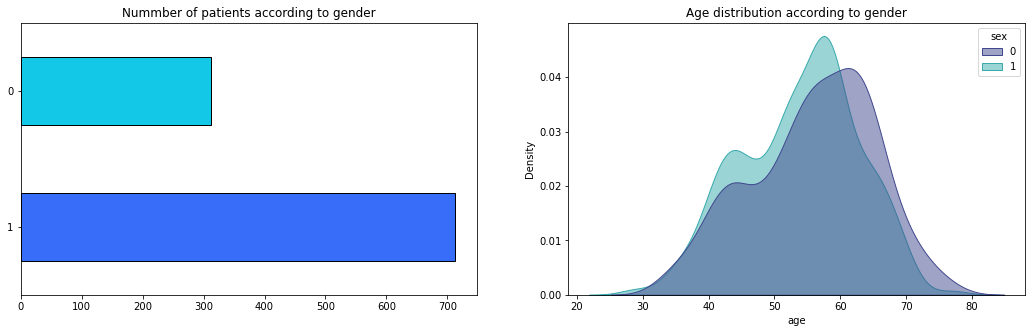

In [13]:
# number of male and female patients and their age distribution
print("Percentage of MALE patients: "+str(round(df.sex.value_counts()[0]*100/1025,2)) + "%")
print("Percentage of FEMALE patients: "+str(round(df.sex.value_counts()[1]*100/1025,2)) + "%")

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
df.sex.value_counts().plot(kind='barh', color=sns.color_palette('rainbow'), edgecolor='black')
plt.title("Nummber of patients according to gender")

plt.subplot(1,2,2)
sns.kdeplot(data=df, x="age", hue="sex", fill=True, common_norm=False, palette="mako", alpha=.5)
plt.title("Age distribution according to gender")
plt.show()

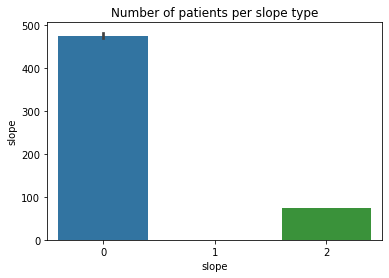

In [14]:
# number of patients having 0,1,2 type of slope
sns.barplot(df['slope'], df['slope'].value_counts())
plt.title("Number of patients per slope type")
plt.show()

Median age of patients: 56.0
Median of resting blood pressure of patients: 130.0
Median Serum cholesterol in mg/dl. of patients: 240.0


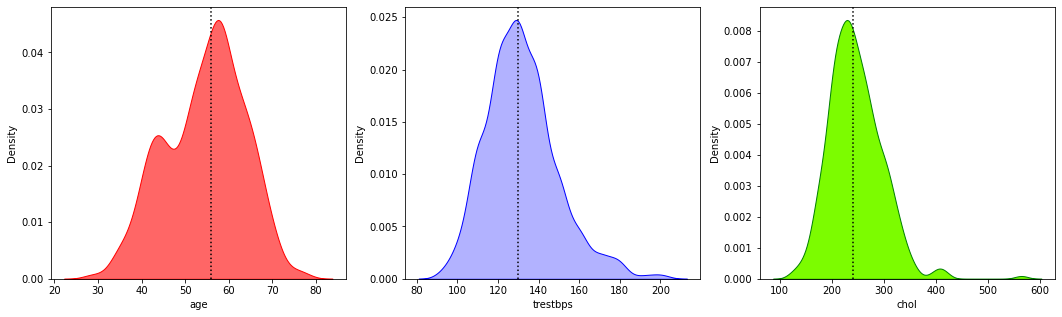

In [19]:
# Age, blood pressure, cholesterol distribution
print("Median age of patients:", df.age.median())
print("Median of resting blood pressure of patients:", df.trestbps.median())
print("Median Serum cholesterol in mg/dl. of patients:", df.chol.median())
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.kdeplot(df.age, fill=True, alpha=0.6, color='red', edgecolor='red')
plt.axvline(df['age'].median(), c='black', linestyle='dotted')

plt.subplot(1,3,2)
sns.kdeplot(df.trestbps, fill=True, alpha=0.3, color='blue', edgecolor='blue')
plt.axvline(df['trestbps'].median(), c='black', linestyle='dotted')

plt.subplot(1,3,3)
sns.kdeplot(df.chol, fill=True, alpha=1,color='lawngreen',edgecolor='green')
plt.axvline(df['chol'].median(), c='black', linestyle='dotted')

plt.show()

Median thalach of patients: 152.0
Median oldpeak of patients: 0.8


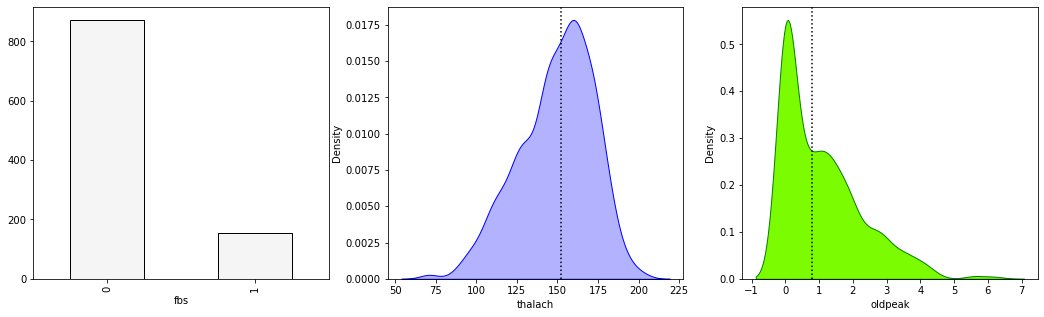

In [16]:
# fbs, thalach, old peak distribution
print("Median thalach of patients:", df.thalach.median())
print("Median oldpeak of patients:", df.oldpeak.median())
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.xlabel('fbs')
df['fbs'].value_counts().plot(kind='bar', color='whitesmoke', edgecolor='black')

plt.subplot(1,3,2)
sns.kdeplot(df.thalach, fill=True, alpha=0.3, color='blue', edgecolor='blue')
plt.axvline(df['thalach'].median(), c='black', linestyle='dotted')

plt.subplot(1,3,3)
sns.kdeplot(df.oldpeak, fill=True, alpha=1,color='lawngreen',edgecolor='green')
plt.axvline(df['oldpeak'].median(), c='black', linestyle='dotted')

plt.show()

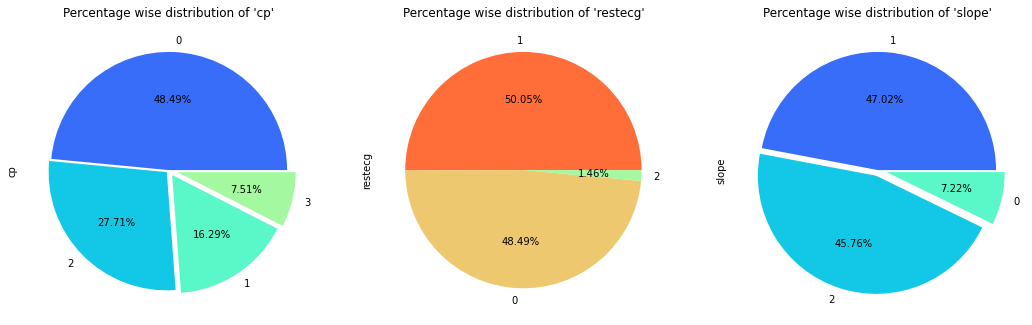

In [17]:
# type of chest pain, restecg and slope percentage wise
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
myexplode = [0, 0.025, 0.05, 0.075]
df['cp'].value_counts().plot.pie(explode=myexplode, autopct='%1.2f%%', colors=sns.color_palette('rainbow'))
plt.title("Percentage wise distribution of 'cp'")

plt.subplot(1,3,2)
myexplode = [0, 0.05, 0.075]
df['restecg'].value_counts().plot.pie(autopct='%1.2f%%', colors=sns.color_palette('rainbow_r'))
plt.title("Percentage wise distribution of 'restecg'")

plt.subplot(1,3,3)
df['slope'].value_counts().plot.pie(explode=myexplode, autopct='%1.2f%%', colors=sns.color_palette('rainbow'))
plt.title("Percentage wise distribution of 'slope'")
plt.show()

### Points to be considered

- cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
- restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
- exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
- slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
- thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

## Bivariate Analysis

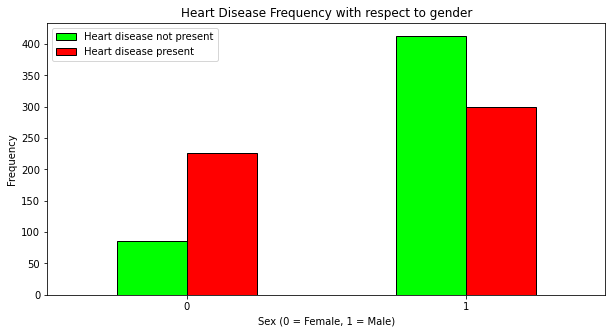

In [18]:
# gender wise presence of heart disease
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(10,5), color=['lime','red' ], edgecolor='black')
plt.title('Heart Disease Frequency with respect to gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Heart disease not present", "Heart disease present"])
plt.ylabel('Frequency')
plt.show()

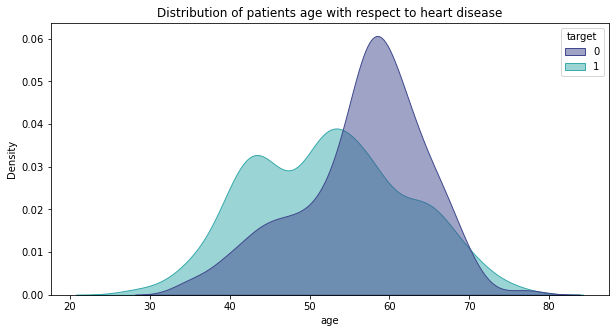

In [19]:
# distribution of patients age with respect to heart disease 
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="age", hue="target", fill=True, common_norm=False, palette="mako", alpha=.5)
plt.title("Distribution of patients age with respect to heart disease")
plt.show()

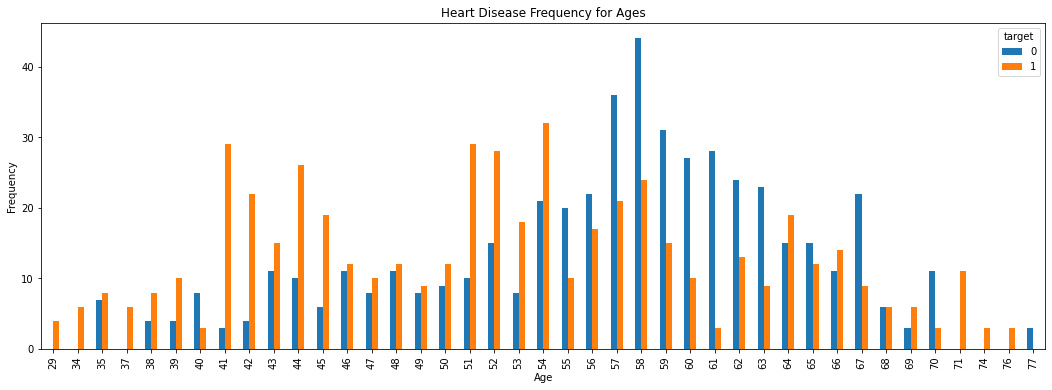

In [20]:
# age wise presence of heart disease representation
pd.crosstab(df.age, df.target).plot(kind="bar",figsize=(18,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

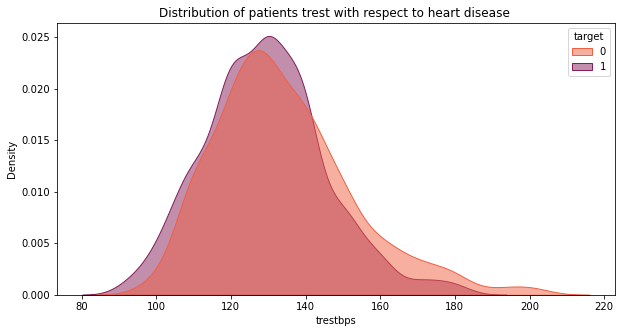

In [26]:
# distribution of patients trest with respect to heart disease 
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="trestbps", hue="target", fill=True, common_norm=False, palette="rocket_r", alpha=.5)
plt.title("Distribution of patients trest with respect to heart disease ")
plt.show()

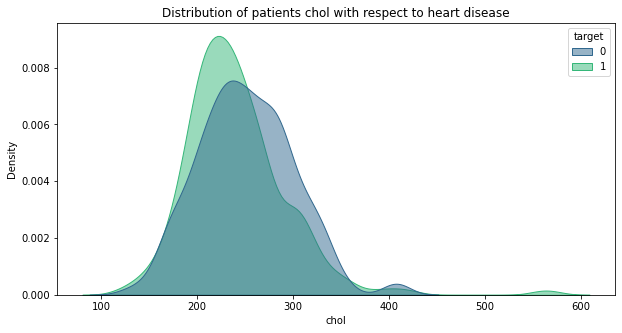

In [27]:
# distribution of patients chol with respect to heart disease 
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="chol", hue="target", fill=True, common_norm=False, palette="viridis", alpha=.5)
plt.title("Distribution of patients chol with respect to heart disease")
plt.show()

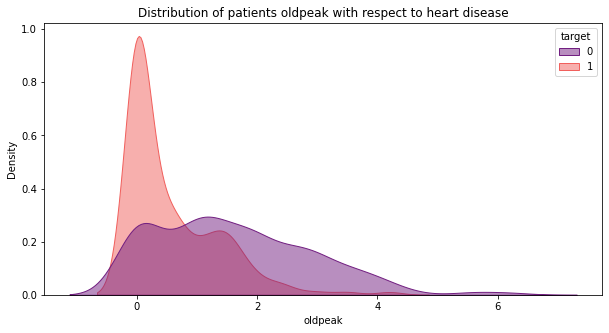

In [28]:
# distribution of patients oldpeak with respect to heart disease
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="oldpeak", hue="target", fill=True, common_norm=False, palette="magma", alpha=.5)
plt.title("Distribution of patients oldpeak with respect to heart disease")
plt.show()

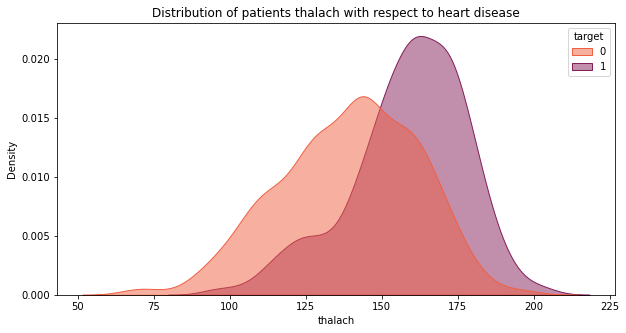

In [29]:
# distribution of patients thalach with respect to heart disease
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="thalach", hue="target", fill=True, common_norm=False, palette="rocket_r", alpha=.5)
plt.title("Distribution of patients thalach with respect to heart disease")
plt.show()

Cp: Chest pain type 
 1: typical angina 
 2: atypical angina 
 3: non-anginal pain 
 4: asymptomatic chest


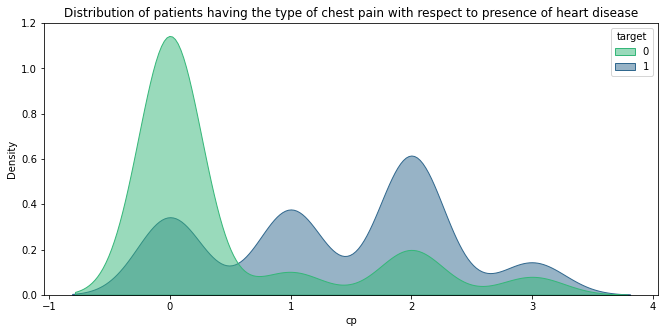

In [29]:
# distribution of type of chest pain with respect of presence of heart disease
print("Cp: Chest pain type \n 1: typical angina \n 2: atypical angina \n 3: non-anginal pain \n 4: asymptomatic chest")

plt.figure(figsize=(11,5))
sns.kdeplot(data=df, x="cp", hue="target", fill=True, common_norm=False, palette="viridis_r", alpha=.5)
plt.title("Distribution of patients having the type of chest pain with respect to presence of heart disease")
plt.show()

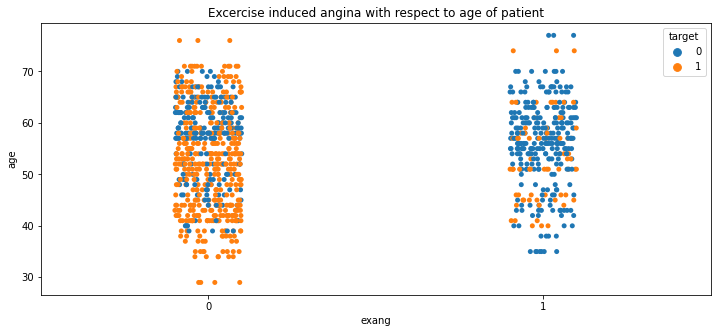

In [43]:
# Excercise induced angina with respect to age of patient
plt.figure(figsize=(12,5))
sns.stripplot(data=df, x='exang', y='age', hue='target')
plt.title("Exercise induced angina with respect to age of patient")
plt.show()

thal:
 0 = normal
 1 = fixed defect
 2 = reversable defect


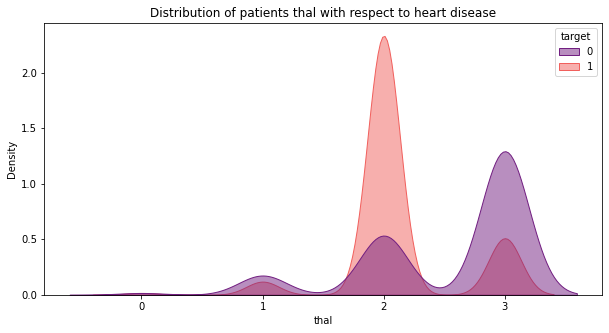

In [30]:
# distribution of patients thal with respect to heart disease
print("thal:\n 0 = normal\n 1 = fixed defect\n 2 = reversable defect")
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="thal", hue="target", fill=True, common_norm=False, palette="magma", alpha=.5)
plt.title("Distribution of patients thal with respect to heart disease")
plt.show()

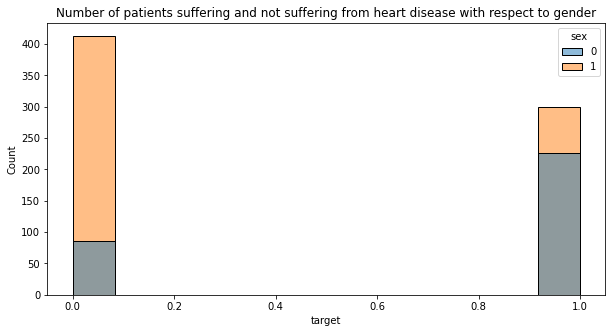

In [27]:
# Number of patients suffering and not suffering from heart disease with respect to gender
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='target', hue='sex')
plt.title("Number of patients suffering and not suffering from heart disease with respect to gender")
plt.show()

## Multivariate Analysis

In [13]:
# correlation of multiple attributes with respect to 'target'
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


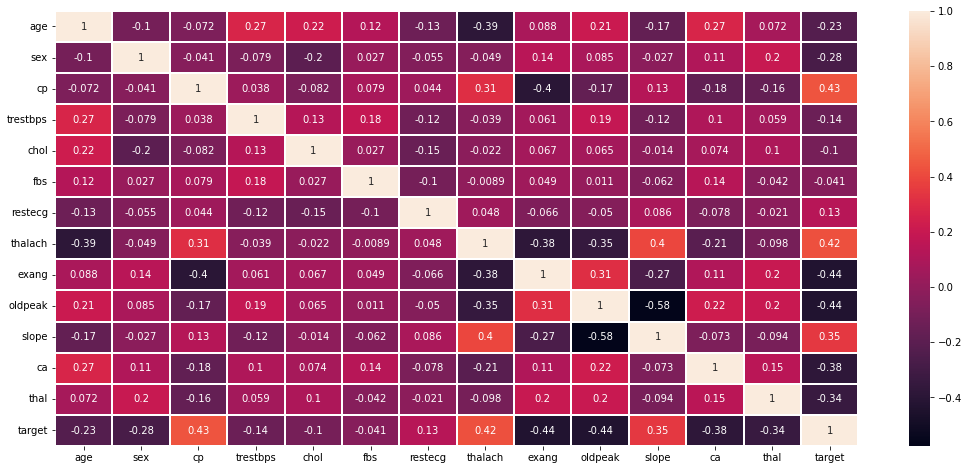

In [54]:
# heat map to represent correlation between each attribute
plt.figure(figsize=(18,8))
sns.heatmap(data=df.corr(), linewidth=.1, annot=True)
plt.show()

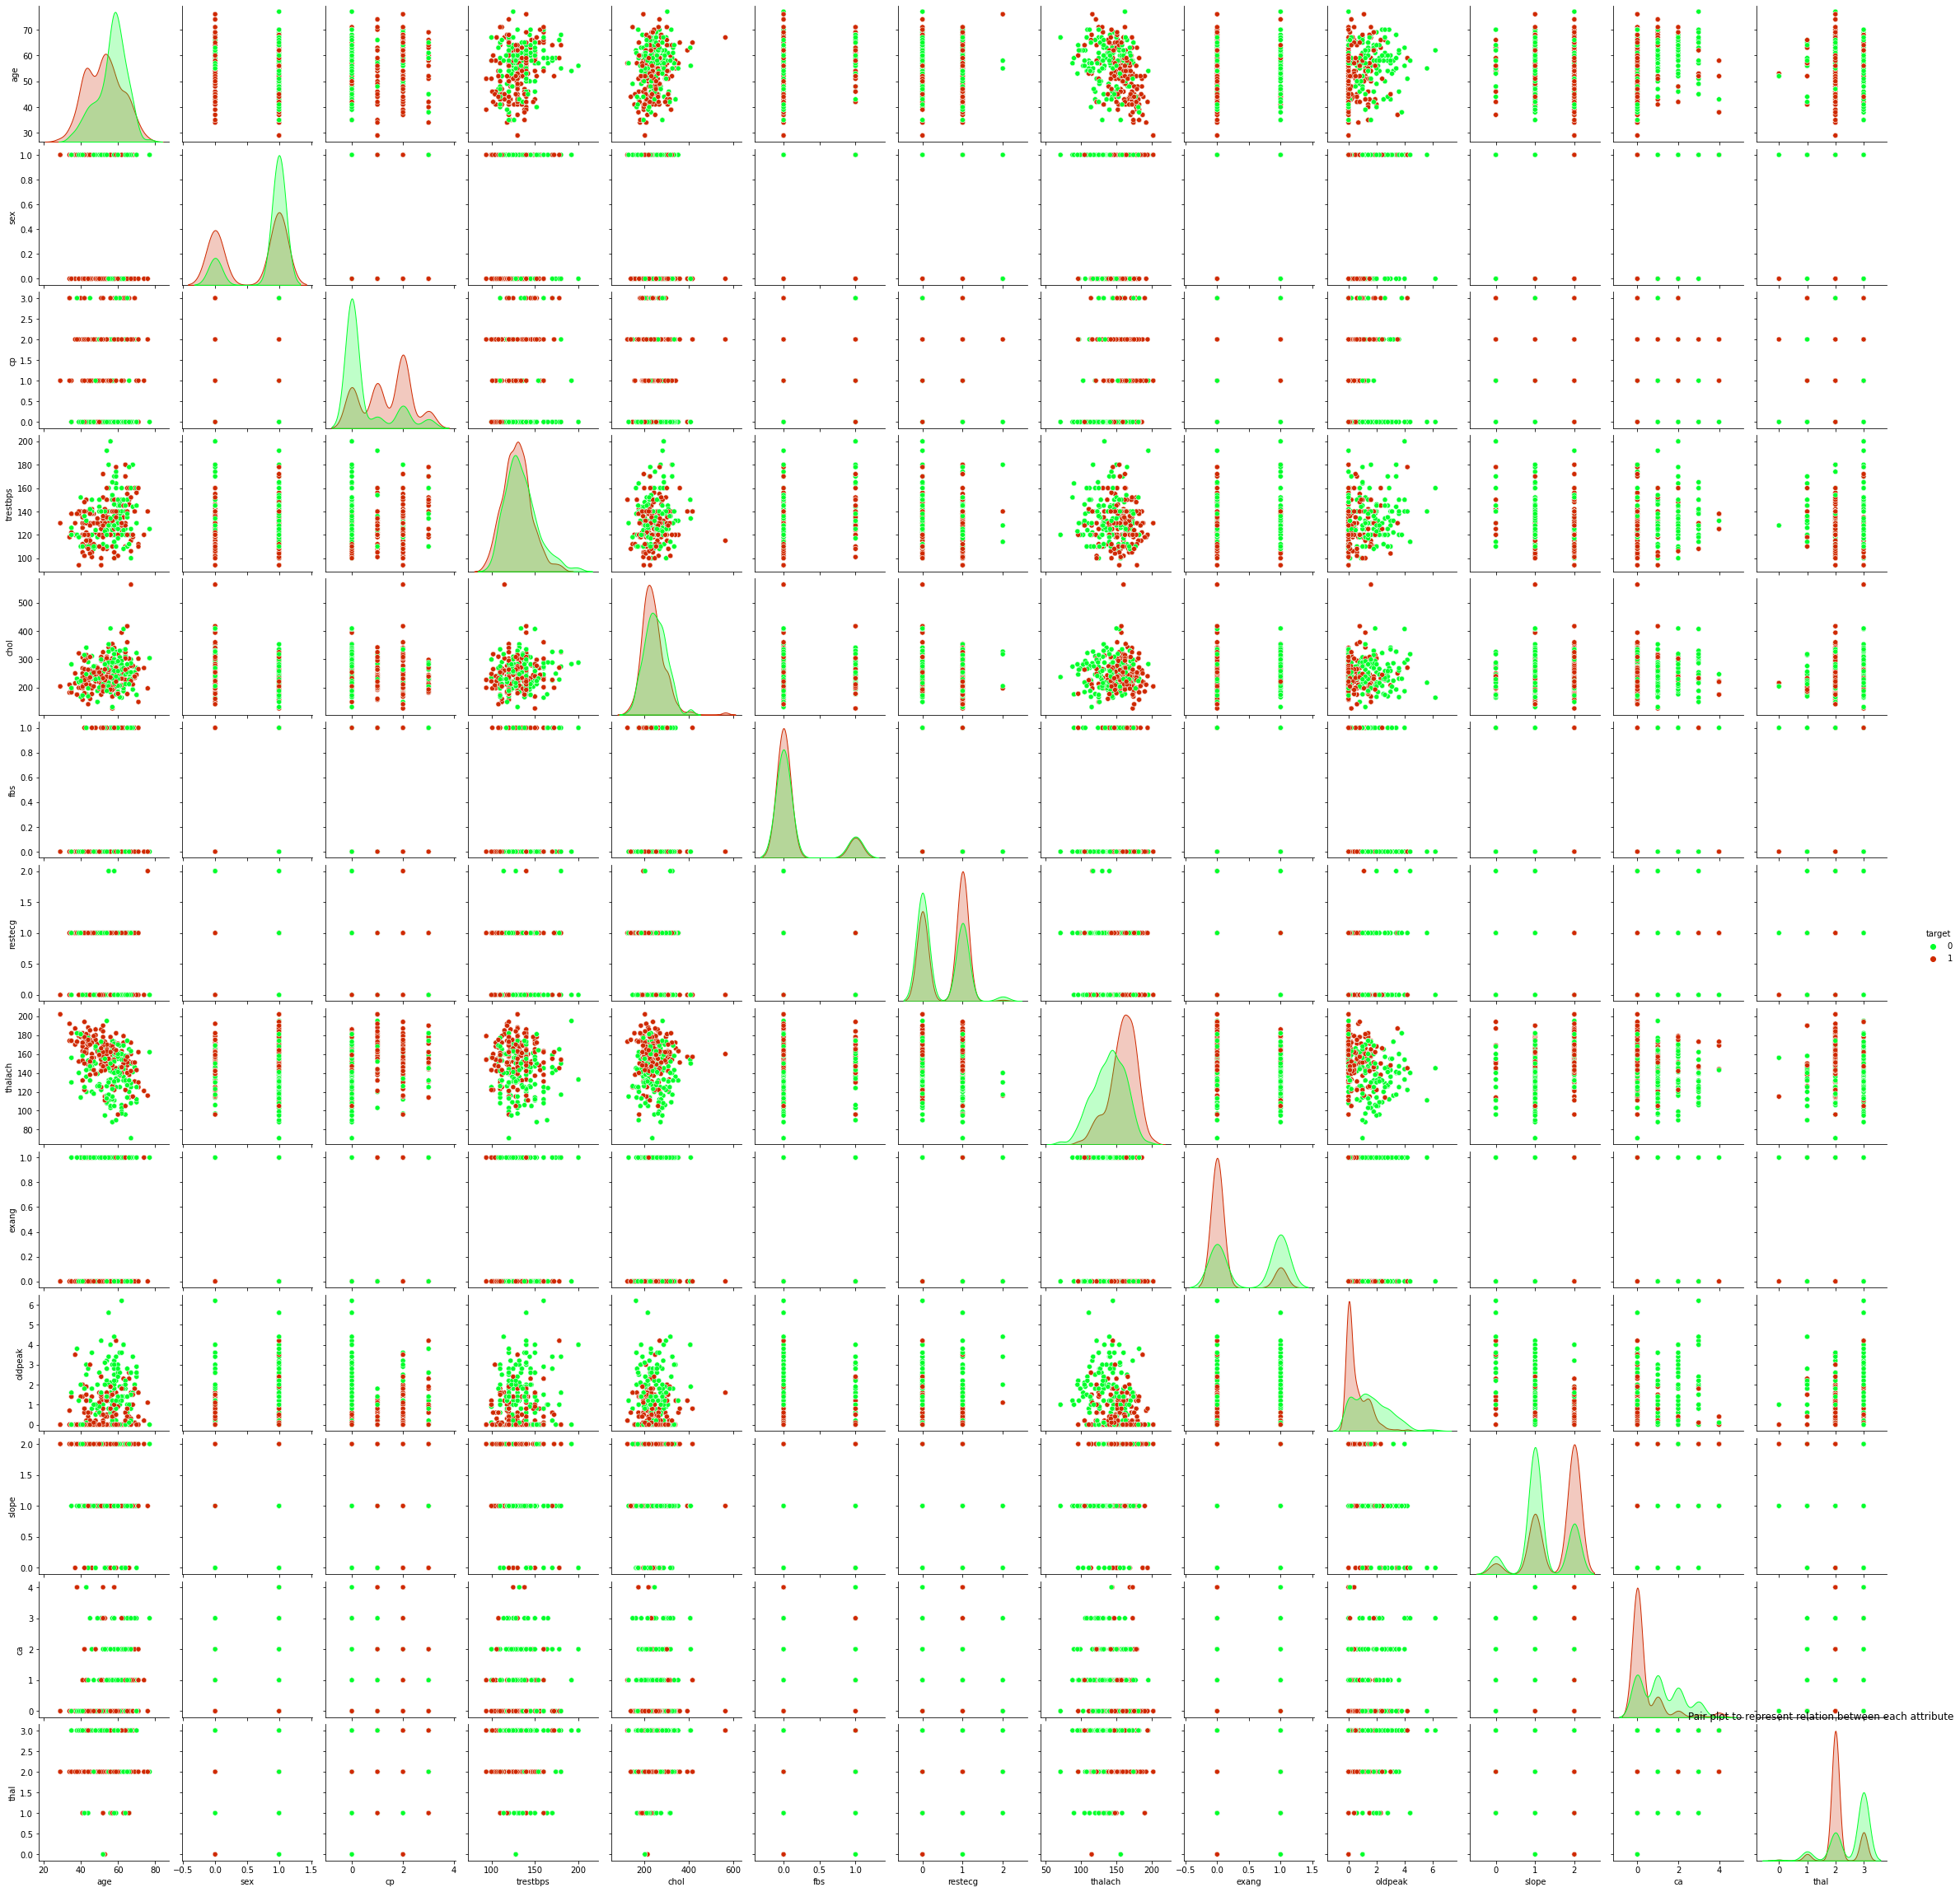

In [45]:
# pair plot to represent relation of each attribute
sns.pairplot(data=df, hue='target', palette=['#00ff2a', '#cf2900'])
plt.title('Pair plot to represent relation between each attribute')
plt.show()

# Conclusion from EDA

1. There are no NaN(null) values in the dataset.
2. The dataset consists of more than twice the number of people with sex = 1(male) than sex = 0(female).
3. Dataset contains few outliers in each of the continuous features.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp.
6. It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
7. According to the distribution plot of `thalachh` wrt `target`, people with higher maximum heart rate achieved have higher chances of heart attack.
8. According to the distribution plot of `oldpeak` wrt `target`, people with lower pevious peak achieved have higher chances of heart attack.
9. The plot 3.2.4 tells about the following -
- People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.
- People with 0 major vessels, that is with caa = 0 have high chance of heart attack.
- People with `sex` = 1 have higher chance of heart attack.
- People with `thall` = 2 have much higher chance of heart attack.
- People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.

#### Modelling and predicting with Machine Learning.<br>
Predicting the occurrence of heart disease with the highest degree of accuracy is the fundamental objective of the entire research. We will test a number of classification techniques to do this. This section summarises the study findings and introduces the top performance using the accuracy metric. I have selected a number of algorithms that are frequently used in classification approaches to solve supervised learning challenges.

In order to train our models, let's first arm ourselves with a useful tool that takes advantage of the SciKit Learn library's coherence. The accuracy on both the train and test sets is displayed so that we may assess if the model overfits or underfits the data (also known as the bias/variance tradeoff).

# Train - Test split

In [12]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

In [13]:
# shape of train data split
X_train.shape

(820, 13)

In [14]:
# shape of test data split
X_test.shape

(205, 13)

In [15]:
# importing multiple perforamnce parameter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Logistic Regression
- One of the most often used Machine Learning algorithms, within the category of Supervised Learning, is logistic regression. Using a predetermined set of independent factors, it is used to predict the categorical dependent variable.
- In a categorical dependent variable, the output is predicted via logistic regression. As a result, the result must be a discrete or categorical value. Rather of providing the exact values of 0 and 1, it provides the probabilistic values that fall between 0 and 1. It can be either Yes or No, 0 or 1, true or false, etc.
- With the exception of how they are applied, logistic regression and linear regression are very similar. While logistic regression is used to solve classification problems, linear regression is used to solve regression problems.
- When classifying observations using various sources of data, logistic regression can be used to quickly identify the factors that will work well. The logistic function is displayed in the graphic below:
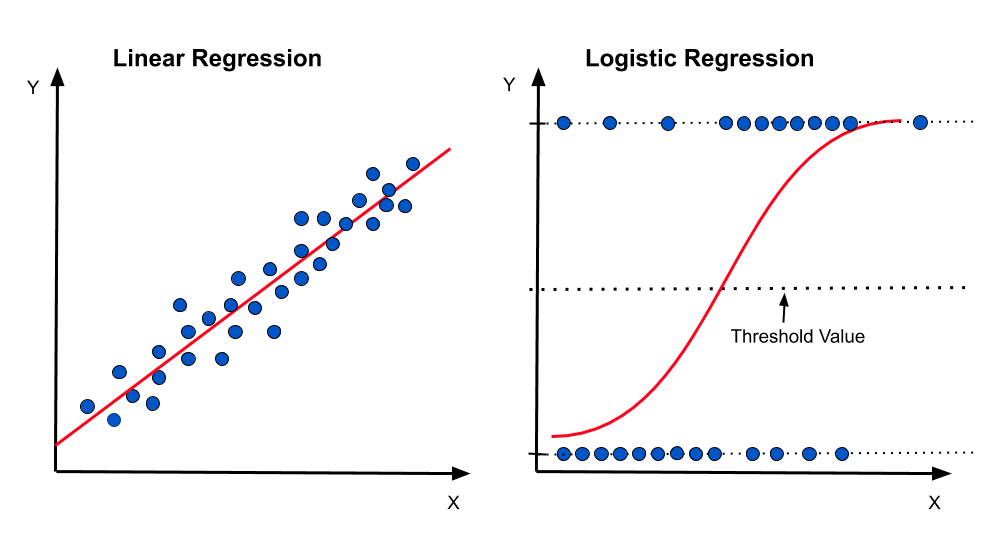

### Logistic Regression (Sigmoid Function)
- The projected values are converted to probabilities using a mathematical tool called the sigmoid function.
- It transforms any real value between 0 and 1 into another value. The logistic regression's value must fall within the range of 0 and 1, and because it cannot go beyond this value, it has the shape of a "S" curve. The S-form curve is called the Sigmoid function or the logistic function.
- We apply the threshold value idea in logistic regression, which establishes the likelihood of either 0 or 1. Examples include values that incline to 1 over the threshold value and to 0 below it.

### Assumptions for Logistic Regression:
- The dependent variable must be categorical in nature.
- The independent variable should not have multi-collinearity.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [17]:
# building logistic regression model
lr = LogisticRegression()

lr.fit(X_train, Y_train)

y_pred_lr = lr.predict(X_test)

In [19]:
print(y_pred_lr)

[1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]


In [27]:
# accuracy score
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [32]:
# confusion matrix
print(confusion_matrix(Y_test,y_pred_lr))

[[ 77  21]
 [  7 100]]


In [33]:
# classification report
print(classification_report(Y_test,y_pred_lr))
print("Accuracy:",accuracy_score(Y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205

Accuracy: 0.8634146341463415


In [29]:
# precision score
precision = precision_score(Y_test, y_pred_lr)
print("Precision: ",precision)

Precision:  0.8264462809917356


In [30]:
# recall value
recall = recall_score(Y_test, y_pred_lr)
print("Recall is: ",recall)

Recall is:  0.9345794392523364


In [31]:
# f-score
print((2*precision*recall)/(precision+recall))

0.8771929824561404


In [21]:
# accuracy score on test dataset
lr.score(X_test, Y_test)

0.8634146341463415

In [22]:
y_pred_lr.shape

(205,)

In [34]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


# Naive Bayes Classifier
- The Naive Bayes algorithm is a supervised learning method for classification issues that is based on the Bayes theorem.
- It is mostly employed in text categorization with a large training set.
- The Naive Bayes Classifier is one of the most straightforward and efficient classification algorithms available today. 
- It aids in the development of quick machine learning models capable of making accurate predictions.
- Being a probabilistic classifier, it makes predictions based on the likelihood that an object will occur.
- Spam filtration, Sentimental analysis, and article classification are a few examples of Naive Bayes algorithms that are frequently used.

### Why is it called Naïve Bayes?
The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:
- Naive: Because it presumes that the occurrence of one trait is unrelated to the occurrence of other features, it is known as naive. A red, spherical, sweet fruit, for instance, is recognised as an apple if the fruit is identified based on its colour, form, and flavour. So, without relying on one another, each characteristic helps to recognise it as an apple.
- Bayes: Due to the fact that it is based on the Bayes' Theorem principle, it is known as Bayes.

### Bayes Theorem
Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.<br>
- Formula:
p(y|x)={p(x|y)p(y)}/{p(x)}

In [35]:
# building naive babyes classifer model
nb = GaussianNB()

nb.fit(X_train,Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

[1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1]


In [36]:
y_pred_nb.shape

(205,)

In [30]:
# accuracy score
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


In [38]:
# presision score
precision = precision_score(Y_test, y_pred_nb)
print("Precision: ",precision)

Precision:  0.8347826086956521


In [39]:
# recall value
recall = recall_score(Y_test, y_pred_nb)
print("Recall is: ",recall)

Recall is:  0.897196261682243


In [40]:
# f-score
print((2*precision*recall)/(precision+recall))

0.8648648648648648


In [41]:
confusion_matrix(Y_test, y_pred_nb)

array([[79, 19],
       [11, 96]], dtype=int64)

In [42]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['Logistic Regression', 'Naive Bayes']

# list of algorithms with parameters
models = [LogisticRegression(), GaussianNB()]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
Logistic Regression,0.863415
Naive Bayes,0.853659


# Conclusion
Both the algorithms give almost same accuracy score when it comes to calculating the presence of heart desease.<br>
But, Logitic regression marginally performs better as compared to Naive Bayes.